In [7]:
import numpy as np

In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
from PIL import Image

In [11]:
df_canada = pd.read_excel(
    "../data_set/canada.xlsx",
    sheet_name="Canada by Citizenship",
    skiprows=range(20),
    skipfooter=2
)

In [12]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [13]:
# data cleansing
df_canada["Country"] = df_canada["OdName"]
df_canada.drop(["Type", "Coverage", "OdName", "AREA", "REG", "DEV"], axis=1, inplace=True)

In [14]:
df_canada.set_index("Country", inplace=True)

In [15]:
df_canada_cp = df_canada.copy()

In [16]:
df_canada_cp.drop(["AreaName", "RegName", "DevName"], axis=1, inplace=True)

In [17]:
df_canada_cp.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [18]:
years = list(map(str, df_canada_cp.columns))
df_canada_cp["Total"] = df_canada_cp.sum(axis=1)

In [19]:
df_canada_cp.shape

(195, 35)

In [20]:
# Waffle Chart 
# digunakan untuk mengetahui porsi dari suatu data (tujuannya sama dengan pie chart)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use("ggplot")

In [21]:
df_canada_filtered = df_canada_cp.loc[["Indonesia", "China", "Japan", "Thailand"]]
df_canada_filtered.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,186,178,252,115,123,100,127,213,270,260,...,632,613,657,661,504,712,390,395,387,13150
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Japan,701,756,598,309,246,198,248,422,324,494,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707
Thailand,56,53,113,65,82,66,78,117,147,177,...,575,500,487,519,512,499,396,296,400,9174


In [22]:
# preprocessing
total_values = sum(df_canada_filtered["Total"])
country_proportions = [ float(value) / (total_values) for value in df_canada_filtered["Total"]]

In [23]:
country_proportions

[0.018521309365021908,
 0.9295331080728965,
 0.039024328408871635,
 0.01292125415320996]

In [24]:
# define tiles
width = 40
height = 10

tiles = width * height

In [25]:
tile_per_country = [round(portion * tiles) for portion in country_proportions]
tile_per_country

[7, 372, 16, 5]

In [26]:
# group to waffle chart
waffle = np.zeros((height, width))

country_index = 0
tile_index = 0
# iterate to fill waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tile_per_country[0:country_index]):
            # ...proceed to the next category
            country_index += 1       
        # set the class value to an integer, which increases with class
        waffle[row, col] = country_index

waffle

array([[1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 3., 3.],
       [1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 3., 3.],
       [1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 3., 3.],
       [1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 3., 3.],
       [1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 3., 3.],
       [1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
   

<Figure size 640x480 with 0 Axes>

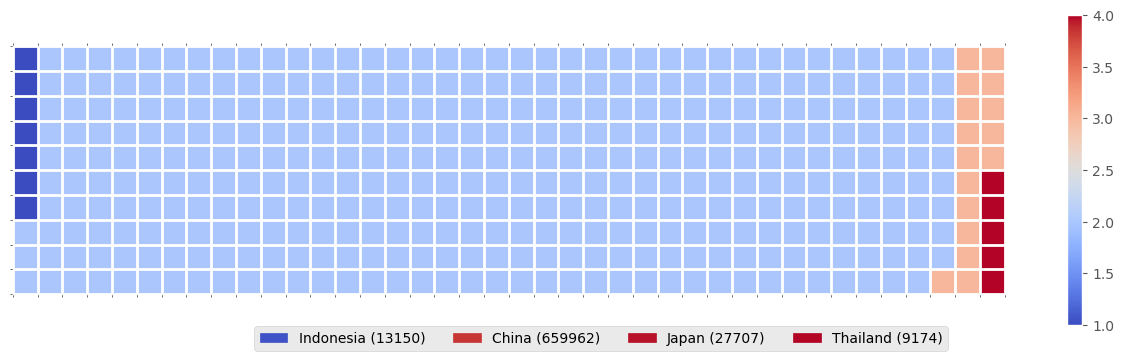

In [27]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle, cmap=colormap)
plt.colorbar()

axis = plt.gca()
axis.set_xticks(np.arange(-.5, (width), 1), minor=True)
axis.set_yticks(np.arange(-.5, (height), 1), minor=True)

axis.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# penggambaran legend
cumsum_immigrant = np.cumsum(df_canada_filtered["Total"])
total_value = cumsum_immigrant.iloc[len(cumsum_immigrant) - 1]

legends = []
for i, category in enumerate(df_canada_filtered.index.values):
    label = category + ' (' + str(df_canada_filtered['Total'].iloc[i]) + ')'
    color = colormap(float(cumsum_immigrant.iloc[i])/ total_values)
    legends.append(mpatches.Patch(color=color, label=label))

plt.legend(
    handles = legends,
    ncol = len(df_canada_filtered.index.values),
    bbox_to_anchor=(0., -0.2, 0.95, .1)
)

In [28]:
# word cloud
!conda install -c conda-forge wordcloud --yes

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [29]:
# !pip install

In [30]:
from wordcloud import WordCloud, STOPWORDS

In [31]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt

In [32]:
alice_novel = open("./alice_novel.txt").read()
stop_words = set(STOPWORDS)
stop_words.add("said")

In [33]:
alice_wc = WordCloud(
    background_color= "white",
    max_words= 3000,
    stopwords=stop_words
)
alice_wc_res = alice_wc.generate(alice_novel)

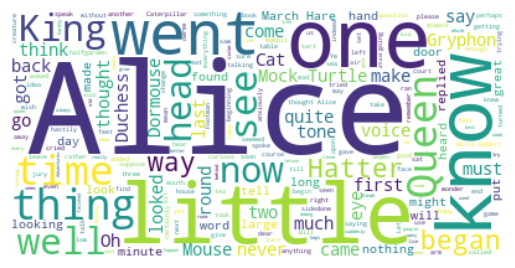

In [34]:
plt.imshow(alice_wc_res, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
# masking to other image

# download image
!wget --quiet https://github.com/ardhiraka/PFDS_sources/raw/master/alice_mask.png -O alice_mask.png

In [36]:
alice_image_arr = np.array(Image.open("./alice_mask.png"))

In [37]:
alice_image_arr

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

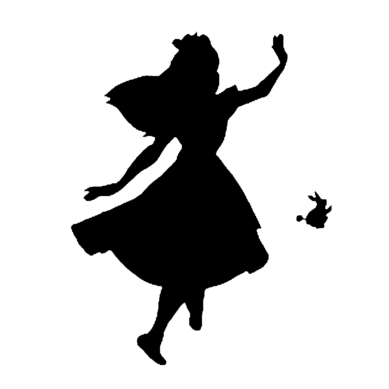

In [38]:
plt.imshow(alice_image_arr, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

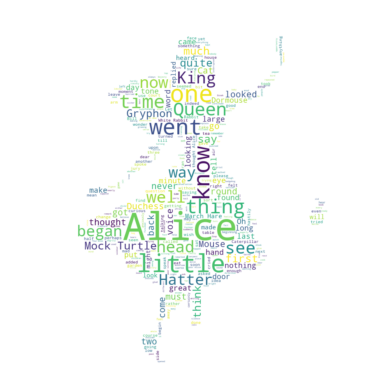

In [39]:
alice_wc = WordCloud(
    background_color= "white",
    max_words= 3000,
    stopwords=stop_words,
    mask=alice_image_arr
)
alice_wc_res = alice_wc.generate(alice_novel)
plt.imshow(alice_wc_res, interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
df_canada_asia = df_canada.loc[df_canada["AreaName"]== "Asia"]

In [41]:
df_canada.drop(["AreaName","RegName", "DevName"], axis=1, inplace=True)

In [42]:
df_canada["Total"] = df_canada.sum(axis=1)

In [43]:
df_canada.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [44]:
df_canada.shape

(195, 35)

In [45]:
total_immigration = df_canada['Total'].sum()
max_word = 150

words = ""
for country in df_canada.index.values:
        if len(country.split(' ')) == 1:
            repeat_num_times = int(df_canada.loc[country, 'Total']/float(total_immigration)*max_word)
            words = words + ((country + ' ') * repeat_num_times)

words

'Afghanistan Algeria Bangladesh China China China China China China China China China China China China China China China Colombia Egypt France France Germany Guyana Haiti India India India India India India India India India India India India India India India India Iraq Israel Jamaica Jamaica Lebanon Lebanon Mexico Morocco Pakistan Pakistan Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Poland Portugal Romania Romania Ukraine '

In [46]:
wc_country = WordCloud(
    background_color= "white"
).generate(words)

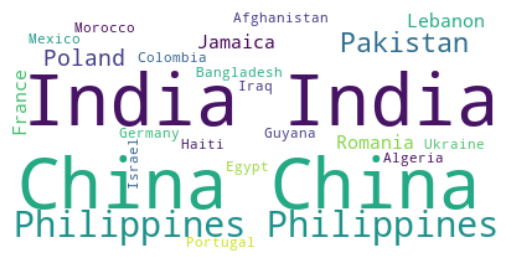

In [47]:
plt.imshow(wc_country, interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
# Regression menggunakan Seaborn
!conda install -c conda-forge seaborn --yes

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [49]:
import seaborn as sns

In [59]:
# ?visualisasikan pertumbuhan immigrant dari china
df_canada_china = df_canada.loc["China"].to_frame()

In [64]:
df_canada_china.drop("Total", axis=0, inplace=True)

In [68]:
df_canada_china.index.name = "Year"

In [70]:
df_canada_china.rename(columns={"China":"Amount"}, inplace=True)

In [71]:
df_canada_china

,Amount
Year,
1980,5123
1981,6682
1982,3308
1983,1863
1984,1527
1985,1816
1986,1960
1987,2643
1988,2758


In [78]:
df_canada_china.reset_index()

,Year,Amount
0,1980,5123
1,1981,6682
2,1982,3308
3,1983,1863
4,1984,1527
5,1985,1816
6,1986,1960
7,1987,2643
8,1988,2758
9,1989,4323


In [90]:
years = [i for i in range (1980, 2013)]

df_china = pd.DataFrame([years, df_canada_china["Amount"][years]])

In [94]:
df_china = df_china.transpose()

In [96]:
df_china.columns = ["year", "amount"]

Text(0.5, 1.0, 'Immigrant China')

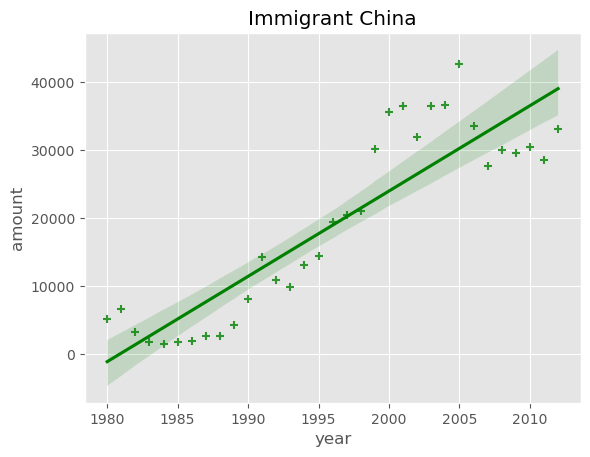

In [102]:
import seaborn as sns
ax = sns.regplot(x="year", y="amount", data = df_china, color="green", marker="+")
ax.set_title("Immigrant China")